In [1]:
!export CUDA_VISIBLE_DEVICES=0

In [2]:
from main_simple_lib import *

File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt


2024-04-22 13:35:55.156115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 13:35:55.299905: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 13:35:55.764153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/mn27889/miniconda3/envs/llavamed-vipergpt/lib/python3.10/site-packages/cv2/../../

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
import pickle
img_train_path = "/data/mn27889/pvqa/images/test/"
qas_train_path = "/data/mn27889/pvqa/qas/test/test_qa.pkl"

with open(qas_train_path, 'rb') as file:
    pvqa_qas = pickle.load(file)

In [4]:
qas_yes_no = [qas for qas in pvqa_qas if qas['answer'] == 'yes' or qas['answer'] == 'no']
ques_yes_no = [qas['question'] for qas in qas_yes_no]
ans_yes_no = [qas['answer'] for qas in qas_yes_no]
img_yes_no = [qas['image']  for qas in qas_yes_no]
img_yes_no_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_yes_no]

In [5]:
qas_general = [qas for qas in pvqa_qas if qas['answer'] != 'yes' and qas['answer'] != 'no']
ques_general = [qas['question'] for qas in qas_general]
ans_general = [qas['answer'] for qas in qas_general]
img_general = [qas['image']  for qas in qas_general]
img_general_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_general]

In [6]:
# for i, img in enumerate(img_general):
#     if img == "test_0013":
#         print(i)

### For a Pathology Image

What surrounds the neoplastic follicles?

a fibrous capsule

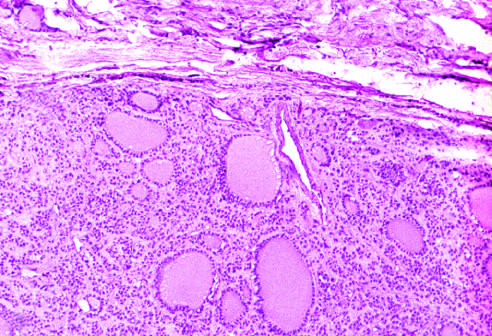

In [7]:
idx = 161
query = ques_general[idx]
query_ans = ans_general[idx]
query_img = Image.open(img_general_path[idx]).convert(mode="RGB")
print(query)
print(query_ans)
query_img

In [8]:
code = get_code(query)

  0 def execute_command(image) -> str:                                                                             
  1     image_patch = ImagePatch(image)                                                                            
  2     key_patches = image_patch.find_histo_patches()                                                             
  3     answers = []                                                                                               
  4     for patch in key_patches:                                                                                  
  5         answers.append(patch.llava_med_query("What surrounds the neoplastic follicles?"))                      
  6     return image_patch.llm_query(" ".join(answers) + " Please summarize this information.")                    

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

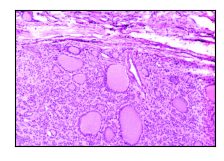

selected_coordinates [(230, 157, 492, 336), (66, 157, 328, 336), (0, 157, 164, 336)]

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

key_patches[0] =

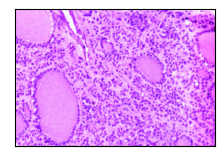

key_patches[1] =

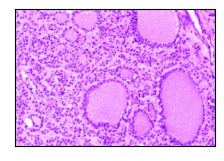

key_patches[2] =

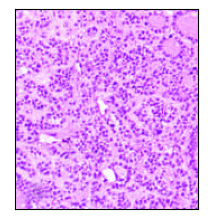

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

answers is empty

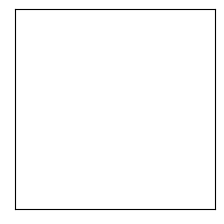

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

patch =

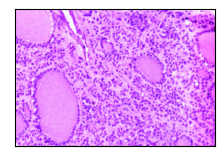

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

answers[-1] = Assistant: fibrous follicles

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

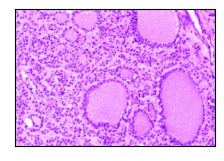

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

answers[-1] = Assistant: sheets of macrophages packed with mycobacteria

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

patch =

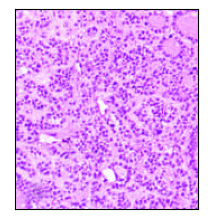

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

answers[-1] = Assistant: sheets of lymphoma cells

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

image_patch.llm_query(' '.join(answers) + ' Please summarize this information.') = The pathology images show 
fibrous follicles, sheets of macrophages packed with mycobacteria, and sheets of lymphoma cells. This could 
indicate a complex pathology involving a combination of chronic inflammation, infection with mycobacteria, and 
lymphoma. Further evaluation and testing would be needed to determine the specific diagnosis and appropriate 
treatment plan.

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = Based on the description provided, the pathology images show fibrous follicles, sheets of macrophages 
packed with mycobacteria, and sheets of lymphoma cells. 

The presence of fibrous follicles may suggest a chronic inflammatory process or a reactive lymphoid hyperplasia. 
Sheets of macrophages packed with mycobacteria are indicative of granulomatous inflammation, which is commonly seen
in infections such as tuberculosis. Finally, sheets of lymphoma cells suggest the presence of a lymphoproliferative
disorder, specifically lymphoma.

Further evaluation and diagnostic tests would be needed to determine the specific underlying cause of these 
findings and to guide appropriate treatment.

'Based on the description provided, the pathology images show fibrous follicles, sheets of macrophages packed with mycobacteria, and sheets of lymphoma cells. \n\nThe presence of fibrous follicles may suggest a chronic inflammatory process or a reactive lymphoid hyperplasia. Sheets of macrophages packed with mycobacteria are indicative of granulomatous inflammation, which is commonly seen in infections such as tuberculosis. Finally, sheets of lymphoma cells suggest the presence of a lymphoproliferative disorder, specifically lymphoma.\n\nFurther evaluation and diagnostic tests would be needed to determine the specific underlying cause of these findings and to guide appropriate treatment.'

In [9]:
execute_code(code, query_img, show_intermediate_steps=True)